In [6]:
import numpy as np
import pandas as pd
import re
import datetime

# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

Oversampling technique will be used to simulate equal representation of the target and non-target class.

In [7]:

def generate_step_count(df, num_days=30):
    np.random.seed(42)  # Ensuring reproducibility
    time_series_data = []
    today = pd.Timestamp.today()  # Avoid repeated function calls

    for _, row in df.iterrows():
        patient_id = row["patient_id"]

        for day in range(1, num_days + 1):
            # Baseline Steps by Age
            if row['age'] < 18:
                base_steps = np.random.normal(12000, 2000)
            elif row['age'] < 40:
                base_steps = np.random.normal(10000, 1500)
            elif row['age'] < 60:
                base_steps = np.random.normal(8000, 1200)
            else:
                base_steps = np.random.normal(6000, 1000)

            # Adjust for BMI
            if row['bmi'] >= 35:
                base_steps *= np.random.uniform(0.5, 0.7)
            elif row['bmi'] >= 30:
                base_steps *= np.random.uniform(0.7, 0.85)
            elif row['bmi'] >= 25:
                base_steps *= np.random.uniform(0.85, 0.95)

            # Adjust for Hypertension
            if row['hypertension'] == 1:
                base_steps *= np.random.uniform(0.75, 0.9)

            # Adjust for Stroke
            if row['stroke'] == 1:
                base_steps *= np.random.uniform(0.3, 0.5)

            # Daily Variability
            base_steps *= np.random.uniform(0.9, 1.1)

            # Ensure step count is within realistic bounds
            step_count = round(max(500, min(base_steps, 14000)))

            # Append to list
            time_series_data.append({
                "patient_id": patient_id,
                "date": today - pd.DateOffset(days=day),
                "step_count": step_count
            })

    return pd.DataFrame(time_series_data)

# Example usage
health_data = pd.DataFrame({
    "patient_id": [1, 2, 3],
    "age": [25, 45, 65],
    "bmi": [22, 32, 37],
    "hypertension": [0, 1, 1],
    "stroke": [0, 0, 1]
})

# Generate time-series step count data
time_series_df = generate_step_count(health_data, num_days=30)

# Save the time-series data separately
time_series_df.to_csv("time_series_wearable_data.csv", index=False)

# Preview the saved data
print("Time-series data saved successfully!")
print(time_series_df.head())


Time-series data saved successfully!
   patient_id                       date  step_count
0           1 2025-01-10 06:35:14.141115       11244
1           1 2025-01-09 06:35:14.141115        9986
2           1 2025-01-08 06:35:14.141115        8796
3           1 2025-01-07 06:35:14.141115       10355
4           1 2025-01-06 06:35:14.141115       11183


In [8]:
# Generate time-series step count data (for 30 days)
time_series_df = generate_step_count(health_data, num_days=30)

# Save the time-series data separately
time_series_df.to_csv("time_series_wearable_data.csv", index=False)

# Preview the saved data
print("Time-series data saved successfully!")
print(time_series_df.head())

Time-series data saved successfully!
   patient_id                       date  step_count
0           1 2025-01-10 06:35:14.174427       11244
1           1 2025-01-09 06:35:14.174427        9986
2           1 2025-01-08 06:35:14.174427        8796
3           1 2025-01-07 06:35:14.174427       10355
4           1 2025-01-06 06:35:14.174427       11183


In [ ]:
sns.histplot(df['bmi'])

In [ ]:
# Create a histogram for the columns with BMI NAN
# Create Subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 9))

# Add a title for the histogram
fig.suptitle('Countplot for the healthcare dataset categorical variable', fontsize=16)

# Plot the histogram
sns.histplot(data=df,kde=True, x="bmi", color="skyblue", ax=axs[0, 0])
sns.histplot(data=df,kde=True, x="avg_glucose_level", color="olive", ax=axs[0, 1])
sns.histplot(data=df,kde=True, x="hypertension", color="gold", ax=axs[0, 2])
sns.histplot(data=df,kde=True, x="heart_disease", color="teal", ax=axs[1, 0])
sns.histplot(data=df,kde=True, x="stroke", color="brown", ax=axs[1, 1])
sns.histplot(data=df,kde=True, x="age", color="orange", ax=axs[1, 2])
#plt.xticks(rotation=45)
# Adjust Layout
plt.tight_layout()
plt.show()

In [ ]:
# Create a histogram for the categorical variable
# Create Subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 9))

# Add a title for the histogram
fig.suptitle('Countplot for the healthcare dataset categorical variable', fontsize=16)

# Plot the histogram
sns.countplot(data=df, x="gender", color="skyblue", ax=axs[0, 0])
sns.countplot(data=df, x="ever_married", color="olive", ax=axs[0, 1])
sns.countplot(data=df, x="work_type", color="gold", ax=axs[0, 2])
sns.countplot(data=df, x="Residence_type", color="teal", ax=axs[1, 0])
sns.countplot(data=df, x="smoking_status", color="brown", ax=axs[1, 1])
sns.histplot(data=df, x="bmi", color="orange", ax=axs[1, 2])
#plt.xticks(rotation=45)
# Adjust Layout
plt.tight_layout()
plt.show()

In [ ]:
# Create a histogram for the categorical variable
# Create Subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 9))

# Add a title for the histogram
fig.suptitle('Countplot for the healthcare dataset categorical variable', fontsize=16)

# Plot the histogram
sns.countplot(data=df, x="gender", hue="stroke", ax=axs[0, 0])
sns.countplot(data=df, x="ever_married", hue="stroke", ax=axs[0, 1])
sns.countplot(data=df, x="work_type", hue="stroke", ax=axs[0, 2])
sns.countplot(data=df, x="Residence_type", hue="stroke", ax=axs[1, 0])
sns.countplot(data=df, x="smoking_status", hue="stroke", ax=axs[1, 1])
sns.histplot(data=df, x="bmi", color="orange", ax=axs[1, 2])
#plt.xticks(rotation=45)
# Adjust Layout
plt.tight_layout()
plt.show()

In [ ]:
### Dealing with outliers
- Boxplot

In [ ]:
sns.boxplot(data=df,x='stroke',y='age')

In [ ]:
### Relationship between age and stroke

In [ ]:
df.loc[19] 

In [ ]:
# Create a histogram for the columns with BMI NAN
# Create Subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 9))

# Add a title for the histogram
fig.suptitle('Countplot for the healthcare dataset categorical variable', fontsize=16)

# Plot the histogram
sns.histplot(data=null_data,kde=True, x="bmi", color="skyblue", ax=axs[0, 0])
sns.histplot(data=null_data,kde=True, x="avg_glucose_level", color="olive", ax=axs[0, 1])
sns.histplot(data=null_data,kde=True, x="hypertension", color="gold", ax=axs[0, 2])
sns.histplot(data=null_data,kde=True, x="heart_disease", color="teal", ax=axs[1, 0])
sns.histplot(data=null_data,kde=True, x="stroke", color="brown", ax=axs[1, 1])
sns.histplot(data=null_data,kde=True, x="age", color="orange", ax=axs[1, 2])
#plt.xticks(rotation=45)
# Adjust Layout
plt.tight_layout()
plt.show()

In [ ]:
# Create Subplots 
fig, axs = plt.subplots(2, 4, figsize=(15, 10))

# Add title
fig.suptitle('Other Categorical Variables Histogram', fontsize=18)

# First row: Overall categorical distribution
sns.countplot(data=merged_data, x='gender', color='skyblue', ax=axs[0, 0])
sns.countplot(data=merged_data, x='work_type', color='olive', ax=axs[0, 1])
sns.countplot(data=merged_data, x='Residence_type', color='gold', ax=axs[0, 2])
sns.countplot(data=merged_data, x='smoking_status', color='teal', ax=axs[0, 3])
#sns.countplot(data=merged_data, x="ever_married", color='brown', ax=axs[0, 4])

# Second row: Categorical variables by stroke status
sns.countplot(data=merged_data, x='gender', hue='stroke', palette='coolwarm', ax=axs[1, 0])
sns.countplot(data=merged_data, x='work_type', hue='stroke', palette='coolwarm', ax=axs[1, 1])
sns.countplot(data=merged_data, x='Residence_type', hue='stroke', palette='coolwarm', ax=axs[1, 2])
sns.countplot(data=merged_data, x='smoking_status', hue='stroke', palette='coolwarm', ax=axs[1, 3])
#sns.countplot(data=merged_data, x="ever_married", hue='stroke', palette='coolwarm', ax=axs[1, 4])

# Rotate x-axis labels for better readability
for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

# Adjust layout and prevent title overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()


In [ ]:
# Create a histogram for the categorical variables
# Create Subplots
fig, axs = plt.subplots(2, 5, figsize=(15, 10))

# Add a title 
fig.suptitle('Categorical variables Histogram', fontsize=16)

fig.title('Categorical variables Histogram', fontsize=16)
# Plot the histogram
sns.countplot(data=merged_data, x='gender', color='skyblue', ax=axs[0, 0])
sns.countplot(data=merged_data, x='work_type', color='olive', ax=axs[0, 1])
sns.countplot(data=merged_data, x='ever_married', color='gold', ax=axs[0, 2])
sns.countplot(data=merged_data, x="Residence_type", color='teal', ax=axs[0, 3])
sns.countplot(data=merged_data, x="smoking_status", color='brown', ax=axs[0, 4])


# Plot the histogram
fig.title('Categorical variables by stroke status', fontsize=16)
sns.countplot(data=merged_data, x='gender', hue='stroke', ax=axs[1, 0])
sns.countplot(data=merged_data, x='work_type', hue='stroke', ax=axs[1, 1])
sns.countplot(data=merged_data, x='ever_married', hue='stroke', ax=axs[1, 2])
sns.countplot(data=merged_data, x="Residence_type", hue='stroke', ax=axs[1, 3])
sns.countplot(data=merged_data, x="smoking_status", hue='stroke', ax=axs[1, 4])

#plt.xticks(rotation=45)
# Adjust Layout
plt.tight_layout()
plt.show()

In [ ]:
# Create Subplots 
fig, axs = plt.subplots(3, 4, figsize=(15, 10))

# Add title
fig.suptitle('Categorical Variables Histogram', fontsize=18)

# First row: Overall categorical distribution
sns.countplot(data=merged_data, x='gender', color='skyblue', ax=axs[0, 0])
sns.countplot(data=merged_data, x='work_type', color='olive', ax=axs[0, 1])
sns.countplot(data=merged_data, x='ever_married', color='gold', ax=axs[0, 2])
sns.countplot(data=merged_data, x="Residence_type", color='teal', ax=axs[0, 3])
sns.countplot(data=merged_data, x="smoking_status", color='brown', ax=axs[2, 0])

# Second row: Categorical variables by stroke status
sns.countplot(data=merged_data, x='gender', hue='stroke', palette='coolwarm', ax=axs[1, 0])
sns.countplot(data=merged_data, x='work_type', hue='stroke', palette='coolwarm', ax=axs[1, 1])
sns.countplot(data=merged_data, x='ever_married', hue='stroke', palette='coolwarm', ax=axs[1, 2])
sns.countplot(data=merged_data, x="Residence_type", hue='stroke', palette='coolwarm', ax=axs[1, 3])
sns.countplot(data=merged_data, x="smoking_status", hue='stroke', palette='coolwarm', ax=axs[2, 1])

# Rotate x-axis labels for better readability
for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

# Adjust layout and prevent title overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()


In [ ]:
# Histplot of gender and stroke status
# Create Subplots 
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Add title 
fig.suptitle('Countplots of Marital status Distribution and Stroke Status', fontsize=16)

# Plot gender distribution
sns.countplot(data=merged_data, x='ever_married', color='skyblue', ax=axs[0])
axs[0].set_title("Marital status Distribution")

# Plot gender distribution with stroke status
sns.countplot(data=merged_data, x='ever_married', hue='stroke', palette='coolwarm', ax=axs[1])
axs[1].set_title("Marital status vs Stroke Status")

# Improve spacing
plt.tight_layout()

# Show the plots
plt.show()




In [ ]:
num_var = merged_data[['age', 'hypertension', 'heart_disease',    'avg_glucose_level',  'bmi',  'stroke', 'resting_heart_rate', 'sleep_duration', 'step_count']]

In [ ]:
# Check for the unique values in the categorical variables and the frequency
merged_data[['gender', 'work_type','ever_married', 'Residence_type', 'smoking_status',]].value_counts()

In [ ]:
# Encoding the multi-class categorical variables
merged_data = pd.get_dummies(merged_data, columns=['ever_married', 'work_type', 'smoking_status'], drop_first=True)

In [ ]:
cat_var = merged_data[['gender', 'hypertension', 'heart_disease', 'work_type','ever_married', 'Residence_type', 'smoking_status', 'stroke']]


In [ ]:
# Correlation Analysis
# Create a heatmap with the correlation matrix
plt.figure(figsize=(10, 8))  
sns.heatmap(merged_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')

# Add a title
plt.title('Correlation Heatmap for Stroke Prediction', fontsize=16)

# Show the plot
plt.show()

In [ ]:
numeric_cols = merged_data[['age', 'avg_glucose_level',  'bmi',  'resting_heart_rate', 'sleep_duration', 'step_count', 'ever_married_Encoded', 'Residence_type_Encoded']]


In [ ]:

# Create Subplots 
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Add title
fig.suptitle('Other Numerical Variables Countplots.', fontsize=18)

# First row: Histogram of Numerical Variables
sns.histplot(data=merged_data,kde=True, x='resting_heart_rate', hue='stroke', ax=axs[0, 0])
sns.histplot(data=merged_data,kde=True, x='sleep_duration', color='gold', ax=axs[0, 1])
sns.histplot(data=merged_data,kde=True, x='step_count', color='teal', ax=axs[0, 2])


# Second row:Boxplot of Numerical Variables
sns.boxplot(data=merged_data, x='stroke', y='resting_heart_rate', ax=axs[1, 0])
sns.boxplot(data=merged_data, x='stroke', y='sleep_duration', ax=axs[1, 1])
sns.boxplot(data=merged_data, x='stroke', y='step_count', ax=axs[1, 2])


# Adjust layout and prevent title overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()


In [ ]:
# Create Subplots 
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Add title
fig.suptitle('Numerical Variables Countplots', fontsize=18)

# First row: Histogram of Numerical Variables
sns.histplot(data=merged_data,kde=True, x='age', color='skyblue', ax=axs[0, 0])
sns.histplot(data=merged_data,kde=True, x='avg_glucose_level', color='olive', ax=axs[0, 1])
sns.histplot(data=merged_data,kde=True, x='bmi', color='gold', ax=axs[0, 2])


# Second row:Boxplot of Numerical Variables
sns.boxplot(data=merged_data, x='stroke', y='age', ax=axs[1, 0])
sns.boxplot(data=merged_data, x='stroke', y='avg_glucose_level', ax=axs[1, 1])
sns.boxplot(data=merged_data, x='stroke', y='bmi', ax=axs[1, 2])

# Adjust layout and prevent title overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()


In [ ]:
# Create a qualitative palette with 4 colors
qual_palette = sns.color_palette("pastel", 4)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a qualitative palette with 4 colors
qual_palette = sns.color_palette("pastel", 2)

# Create Subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Add title
fig.suptitle('Numerical Variables Countplots', fontsize=18)

# First row: Histogram of Numerical Variables
sns.histplot(data=merged_data, kde=True, x='age', hue='stroke', multiple='stack', ax=axs[0, 0], palette=qual_palette)
sns.histplot(data=merged_data, kde=True, x='avg_glucose_level', hue='stroke', multiple='stack', ax=axs[0, 1], palette=qual_palette)
sns.histplot(data=merged_data, kde=True, x='bmi', hue='stroke', multiple='stack', ax=axs[0, 2], palette=qual_palette)

# Second row: Boxplot of Numerical Variables
sns.boxplot(data=merged_data, x='stroke', y='age', ax=axs[1, 0], palette=qual_palette)
sns.boxplot(data=merged_data, x='stroke', y='avg_glucose_level', ax=axs[1, 1], palette=qual_palette)
sns.boxplot(data=merged_data, x='stroke', y='bmi', ax=axs[1, 2], palette=qual_palette)

# Adjust layout and prevent title overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()


In [ ]:
sns.pairplot(plot_var, hue='stroke', kind='kde')

In [ ]:
sns.pairplot(plot_var, hue='stroke', kind='reg',
             plot_kws={'line_kws':{'color':'red'}})

In [ ]:
### Correlation Analysis
### Create a heatmap with the correlation matrix
# Define varaibles to be used for the heatmap
# Correlation Analysis
# Create a heatmap with the correlation matrix
plt.figure(figsize=(10, 8))  
sns.heatmap(merged_data.corr(), annot=True, fmt='.1f')

# Add a title
plt.title('Correlation Heatmap for Stroke Prediction', fontsize=16)

# Show the plot
plt.show()

In [ ]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')

# Add axis labels and title
plt.title('LR Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()


# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rfc), annot=True, fmt='d', cmap='Blues')
plt.title('RFC Confusion Matrix')

# Add axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()


# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')

# Add axis labels and title
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()



# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')

# Add axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dtc), annot=True, fmt='d', cmap='Blues')

# Add axis labels and title
plt.title('DTC Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()


In [ ]:
# Define the models and their predictions 
models = ['Logistic Regression', 'Random Forest', 'KNN', 'SVM', 'Decision Tree']
y_preds = [y_pred_lr, y_pred_rfc, y_pred_knn, y_pred_svm, y_pred_dtc]

# Create subplots
fig, axs = plt.subplots(1, 5, figsize=(15, 5)) 

# Loop through each model and its prediction
for i, (model, y_pred) in enumerate(zip(models, y_preds)):
    ax = axs[i]  # Directly access each subplot 
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{model} Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

# Adjust layout for better spacing
plt.tight_layout()
plt.suptitle('Figure 1.5: Confusion Matrices for Multiple Models', fontsize=16, y=1.02)
plt.show()



In [ ]:
# Linear Regression
# Initialize and train the model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
# Evaluation metrics
print(f'Linear Regression Classifier Accuracy: {accuracy_score(y_test, y_pred_lr)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred_lr)}')

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')

# Add axis labels and title
plt.title('LR Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()


## Choosing an ideal model based on accuracy and classification report;


- Accuracy

- Precision

- Recall: 

- F1-score



In [ ]:
# Get feature importance
feature_importances = dtc_model.feature_importances_

# Assuming you have a DataFrame with feature names in X_train
features = X_train.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues_d')
plt.title('Feature Importance from Decision Tree Classifier')
plt.show()


# Scaling
# correlation analysis to determine feature importance using a Random Forest Classifier from sklearn.ensemble
# Splitting the Data into Training and Testing Sets
# Determining the Best Algorithm:  few classifier, regression, and clustering algorithms: logistic regression, SVM, K Nearest neighbour, Random Forest Classifier
# Result of the prediction

### Problem Statement: 
Stroke has been identified as the second leading cause of death and the third leading cause of both death and disability worldwide ([Feigin, 2022](https://www.dropbox.com/scl/fi/tiqrhvs06s58yamxa053x/World-Stroke-Organization-WSO-Global-Stroke-Fact-Sheet-2022.pdf?rlkey=pbndaqvaadzpij099dwe6psx5&e=1&dl=0)). The center for disease control has identified risk factors for stroke to include Previous stroke or transient ischemic attack, heart disease, High cholesterol, hypertension, diabetes, Sickle cell disease, smoking, Genetics and family history, age, sex and race [(CDC),(https://www.cdc.gov/stroke/risk-factors/index.html)].
1. What features in the dataset shows correlation with stroke?
2. Is health data synthesis using random number generators useful fo simulation of disease state? 
3. Is there any impact of the addition of the synthetic waerable device data to the original kaggle stroke dataset offer better stroke prediction using machine learning evaluation?

In [1]:
# function to perform basic exploratory data analysis on a given DataFrame
def basic_EDA(dataframe):
    print("First 5 rows:\n", dataframe.head(), "\n")
    print("Last 5 rows:\n", dataframe.tail(), "\n")
    print("DataFrame Information:\n")
    dataframe.info()
    print("\nStatistical Summary:\n", dataframe.describe())


In [ ]:
# function to perform basic exploratory data analysis on a given DataFrame
def basic_EDA(dataframe):
    print("First 5 rows:\n", dataframe.head(), "\n")
    print("Last 5 rows:\n", dataframe.tail(), "\n")
    print("DataFrame Information:\n")
    dataframe.info()
    print("\nStatistical Summary:\n", dataframe.describe())


In [2]:
basic_EDA(dataframe)  # Call the function with the specific DataFrame name

NameError: name 'dataframe' is not defined

In [ ]:
# Iterate over each categorical variable
for variable in ['gender', 'hypertension', 'heart_disease', 'work_type', 'ever_married', 'Residence_type', 'smoking_status']:
    print(f"Percentages for {variable}:")
    
    # Iterate through the unique categories in each variable
    for category in merged_data[variable].unique():
        # Subset data to the specific category
        subgroup = merged_data[merged_data[variable] == category]
        
        # Count the occurrences of stroke (0 = no stroke, 1 = stroke)
        stroke_counts = subgroup['stroke'].value_counts()
        
        # Total number of individuals in the subgroup
        total_count = len(subgroup)
        
        # If the subgroup has individuals, calculate the percentage of stroke occurrence
        if total_count > 0:
            # Stroke count (1 for stroke, 0 for no stroke)
            stroke_percentage = (stroke_counts.get(1, 0) / total_count) * 100  # Stroke count divided by total in category
            
            print(f"  - {category}: {stroke_percentage:.1f}% strokes")
    
    print()  # Empty line for readability


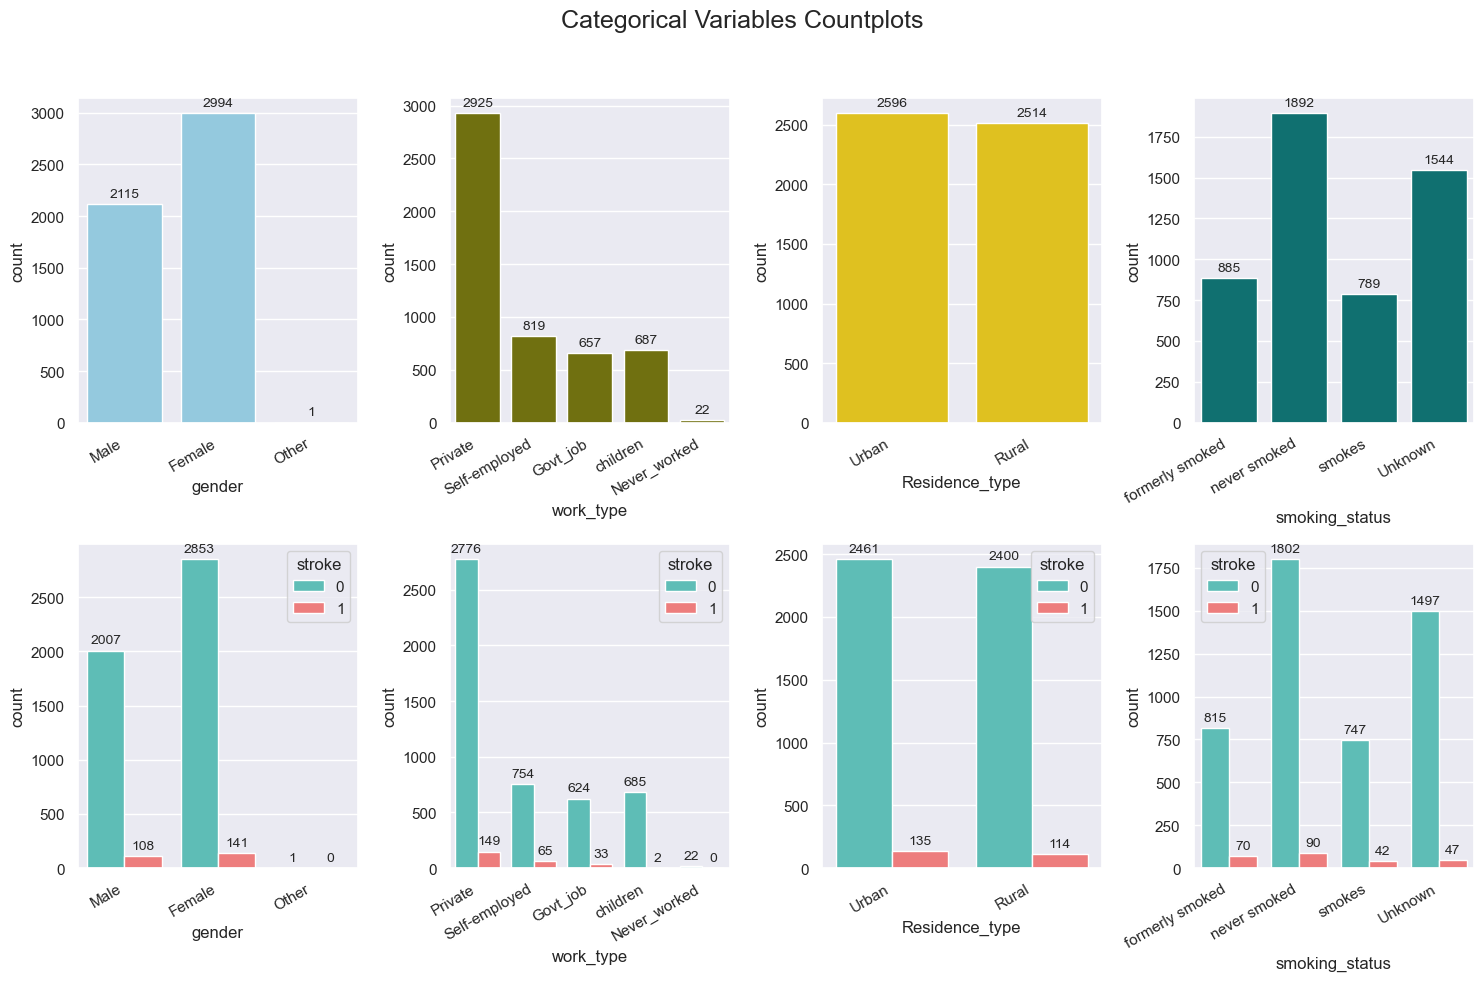

In [ ]:
# Create Subplots 
fig, axs = plt.subplots(2, 4, figsize=(15, 10))

# Add title
fig.suptitle('Categorical Variables Countplots', fontsize=18)

# First row: Overall categorical distribution
sns.countplot(data=merged_data, x='gender', color='skyblue', ax=axs[0, 0])
sns.countplot(data=merged_data, x='work_type', color='olive', ax=axs[0, 1])
sns.countplot(data=merged_data, x='Residence_type', color='gold', ax=axs[0, 2])
sns.countplot(data=merged_data, x='smoking_status', color='teal', ax=axs[0, 3])


# Second row: Categorical variables by stroke status
sns.countplot(data=merged_data, x='gender', hue='stroke', palette=custom_palette, ax=axs[1, 0])
sns.countplot(data=merged_data, x='work_type', hue='stroke', palette=custom_palette, ax=axs[1, 1])
sns.countplot(data=merged_data, x='Residence_type', hue='stroke', palette=custom_palette, ax=axs[1, 2])
sns.countplot(data=merged_data, x='smoking_status', hue='stroke', palette=custom_palette, ax=axs[1, 3])

# Add value counts on top of bars
for ax in axs.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=10, padding=3)  # Add labels to each bar

# Rotate x-axis labels for better readability
for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

# Adjust layout and prevent title overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()


In [ ]:
# Add value counts on top of bars
for ax in axs.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=10, padding=3)  # Add labels to each bar

# Rotate x-axis labels for better readability
for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

In [ ]:
# Create Subplots 
fig, axs = plt.subplots(2, 4, figsize=(15, 10))

# Add title
fig.suptitle('Categorical Variables Countplots', fontsize=18)

# First row: Overall categorical variables distribution
sns.countplot(data=merged_data, x='gender', color='skyblue', ax=axs[0, 0])
sns.countplot(data=merged_data, x='work_type', color='olive', ax=axs[0, 1])
sns.countplot(data=merged_data, x='Residence_type', color='gold', ax=axs[0, 2])
sns.countplot(data=merged_data, x='smoking_status', color='teal', ax=axs[0, 3])


# Add absolute count labels to the first row (absolute counts)
for ax in axs[0, :]:
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height + 3, f'{int(height)}', ha='center', fontsize=10)

# Second row: Categorical variables by stroke status
sns.countplot(data=merged_data, x='gender', hue='stroke', palette=custom_palette, ax=axs[1, 0])
sns.countplot(data=merged_data, x='work_type', hue='stroke', palette=custom_palette, ax=axs[1, 1])
sns.countplot(data=merged_data, x='Residence_type', hue='stroke', palette=custom_palette, ax=axs[1, 2])
sns.countplot(data=merged_data, x='smoking_status', hue='stroke', palette=custom_palette, ax=axs[1, 3])

# Function to add both absolute counts and percentages as labels
def add_counts_and_percentages(ax):
    for container in ax.containers:
        total = sum([bar.get_height() for bar in container])
        for bar in container:
            height = bar.get_height()
            percentage = (height / total) * 100
            count_label = f'{int(height)}'  # Absolute count
            percentage_label = f'{percentage:.1f}%'  # Percentage label
            ax.text(bar.get_x() + bar.get_width() / 2, height + 3, f"{count_label}\n({percentage_label})", 
                    ha='center', fontsize=10)

# Add both absolute counts and percentages on the second row plots
for ax in axs[1, :]:
    add_counts_and_percentages(ax)

# Rotate x-axis labels for better readability
for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

# Adjust layout and prevent title overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()

In [ ]:

# Create Subplots 
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Add title
fig.suptitle('Other Numerical Variables Countplots.', fontsize=18)

# First row: Histogram of Numerical Variables
sns.histplot(data=merged_data,kde=True, x='resting_heart_rate', hue='stroke', multiple='stack', ax=axs[0, 0])
sns.histplot(data=merged_data,kde=True, x='sleep_duration', hue='stroke', multiple='stack', ax=axs[0, 1])
sns.histplot(data=merged_data,kde=True, x='step_count', hue='stroke', multiple='stack', ax=axs[0, 2])


# Second row:Boxplot of Numerical Variables
sns.boxplot(data=merged_data, x='stroke', y='resting_heart_rate', ax=axs[1, 0])
sns.boxplot(data=merged_data, x='stroke', y='sleep_duration', ax=axs[1, 1])
sns.boxplot(data=merged_data, x='stroke', y='step_count', ax=axs[1, 2])


# Adjust layout and prevent title overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()


In [ ]:
numeric_cols = merged_data[['age', 'avg_glucose_level',  'bmi',  'resting_heart_rate', 'sleep_duration', 'step_count']]


In [ ]:
# ? Reduce var to plot

plot_vars = merged_data[['age', 'avg_glucose_level', 'sleep_duration', 'step_count', 'stroke']]

In [ ]:
sns.pairplot(plot_vars, hue='stroke')

In [ ]:
sns.pairplot(plot_var, hue='stroke', corner=True)

In [ ]:
sns.pairplot(plot_var, hue='stroke', height=2.5)

## Before training the models, we conducted data preprocessing steps including handling missing values (replacing them with the median value for BMI), feature scaling, and splitting the data into training and testing sets.

The  countplots showed a higher incidence of stroke was noted among the married subjects, former smokers, self employed status and those working in the private sector. The univariate and bivariate analysis of the numerical variables using histplots and boxplots respectivelyahowed a normal distribution of the population with a higher incidence of stroke observed in the elderly subjects above 60 years of age. The stroke population have the average glucose concentration ranging from normal to high with most of the stroke subjects having higher average  glucose concenetration. A significantly lower sleep duration and step counts was observed in the subjects with stroke compared to the rest of the population.

Futhermore, the pairplot and heatmap revealed a strong negative correlation between age and step count (-0.8), BMI and step count (-0.6), as well as sleep duration and step count (-0.5), while the correlations with other variables were relatively weak. However, there is need to exclude other cofounding factors to ascertain the strength of these relationships.

The trained decision tree and the random forest models on the scaled stroke dataset showed a remarkable accuracy of 99.6% and 99.5% in stroke prediction when tested with the variables age, average glucose level, bmi, resting heart rate, sleep_duration and step count with 94% precison for both models. This is quite promising showing that data science and machine learning can provide useful insights for disease likelihood and diagnosis.

The random forest classifier correlation analysis was performed to determine feature importance. The report below shows that sleep duration, step count, age and formerly smoked status have the strongest influence on a stroke event. This was chosen over the decision tree correlation anlysis because it captured more variables in the feature importance. 


## Conclusion

The analysis of the stroke dataset revealed valuable insights into stroke prediction, with key features such as age, glucose concentration, BMI, sleep duration, and step count playing significant roles in predicting stroke events. 
The trained decision tree and the random forest models on the scaled stroke dataset showed a remarkable accuracy of 99.6% and 99.5% in stroke prediction when tested with the variables age, average glucose level, bmi, resting heart rate, sleep_duration and step count with 94% precison for both models. This is quite promising showing that data science and machine learning can provide useful insights for disease likelihood and diagnosis.

However, this model will need further testing and refinement with actual wearable device and stroke  and non-stroke datasets before it can be deployed for use on real patient data for stroke prediction.  